# etude sur Alien vs Predator - épisode 4 : A New Hope

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import tensorflow

#### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

#### connexion to drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/2022_02_08_ep4_Alien_Predator/'

TRAINING_DIR = dataset_dir + 'Data/Train/'
VALIDATION_DIR = dataset_dir + 'Data/Validation/'
TEST_DIR = dataset_dir + 'Data/Test/'

#### 3 - charger des donnés

In [5]:
X_test = np.load(dataset_dir + 'X_test.npy')
y_test = np.load(dataset_dir + 'y_test.npy')

#### 4 - charger le modele VGG-16

In [6]:
model_4 = load_model('/content/drive/MyDrive/Colab Notebooks/2022_02_08_ep4_Alien_Predator/' + 'model_ep4')

#### 5 - prediction

In [7]:
y_test_pred = model_4.predict(X_test)

In [8]:
y_test_pred  = y_test_pred > 0.5

#### 6 - matrix de confusion

In [9]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[95,  5],
       [13, 87]])

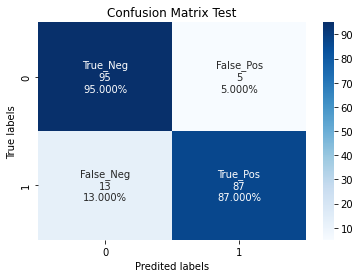

In [10]:
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

In [11]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.88      0.95      0.91       100
  Predator 1       0.95      0.87      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [12]:
accuracy_score_keras = tensorflow.keras.metrics.BinaryAccuracy()
accuracy_score_keras.update_state(y_test, y_test_pred)
print(accuracy_score_keras.result().numpy())

0.91


#### 7 - Courbe ROC, AUC

In [13]:
AUC_keras = tensorflow.keras.metrics.AUC()
AUC_keras.update_state(y_test, y_test_pred)
AUC_keras.result().numpy()

0.90999997

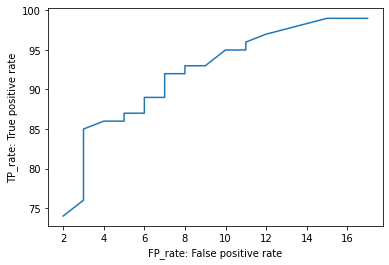

In [14]:
#COURBE ROC

FP_rate = []
TP_rate = []

for seuil in AUC_keras.thresholds[1:-1] :
    FP_rate_seuil = tensorflow.keras.metrics.FalsePositives(thresholds=seuil)
    FP_rate_seuil.update_state(y_test, model_4.predict(X_test).flatten())
    
    FP_rate.append(FP_rate_seuil.result().numpy())
    
    
    TP_rate_seuil = tensorflow.keras.metrics.TruePositives(thresholds=seuil)
    TP_rate_seuil.update_state(y_test, model_4.predict(X_test).flatten())
    
    TP_rate.append(TP_rate_seuil.result().numpy())

    
    
#print(TP_rate)
#print(FP_rate)
    
fig = plt.figure()
plt.plot(FP_rate, TP_rate)
plt.xlabel('FP_rate: False positive rate')
plt.ylabel('TP_rate: True positive rate')
plt.show()

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
print('AUC_test : {:.3f}'.format(roc_auc))

AUC_test : 0.910


In [16]:
auc = auc(fpr, tpr)

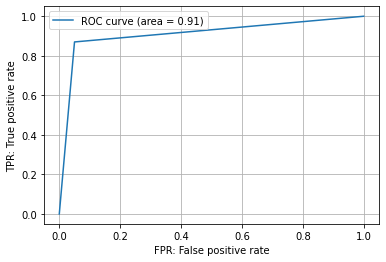

In [17]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()